In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Derive Log Returns
# Load the dataset
price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0)
ticker_data = pd.read_csv("SP500_ticker.csv", index_col=0)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data with the first column as the index
raw_price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0)
ticker_info = pd.read_csv("SP500_ticker.csv", encoding="ISO-8859-1")

# Derive log returns using the specified formula
log_returns = np.log(raw_price_data.shift(-1) / raw_price_data).dropna()

# Standardize the log returns
scaler = StandardScaler()
standardized_returns = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(standardized_returns)
print(log_returns)




                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-03 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-04  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-05 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-06  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-07  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   
...              ...       ...       ...       ...       ...       ...   
2014-12-24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-12-25 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000   
2014-12-26  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766   
2014-12-29 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342   
2014-12-30 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095   

                 AES       AET       

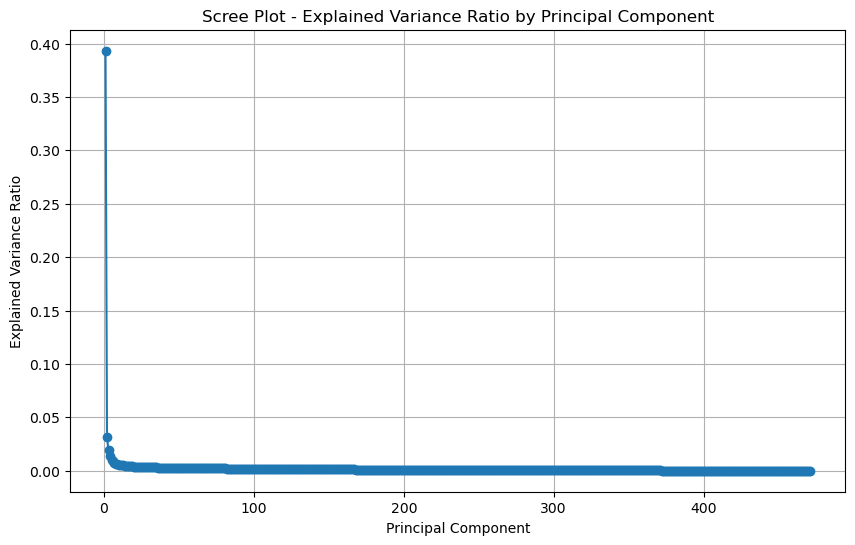

In [2]:
# Step 3: Plot Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot - Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


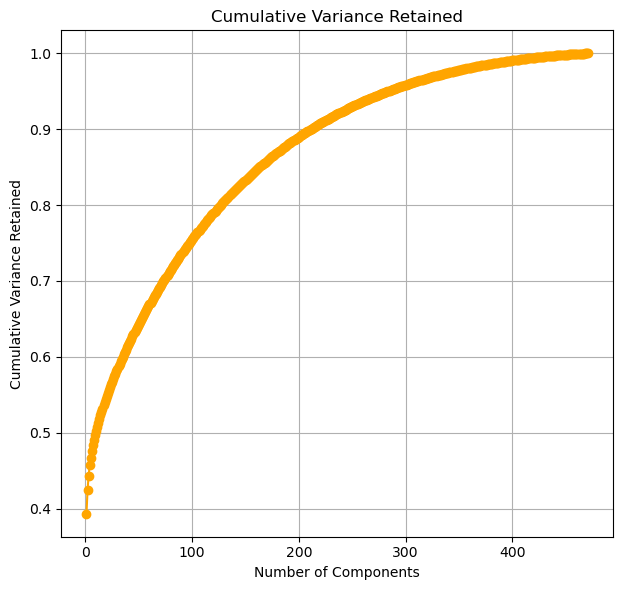

In [3]:


# Step 1: Derive Log Returns
# Load the dataset
price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0)
ticker_data = pd.read_csv("SP500_ticker.csv", index_col=0)

# Compute log returns
log_returns = np.log(price_data / price_data.shift(1)).dropna()

# Step 2: Fit PCA Model
pca = PCA()
pca.fit(standardized_returns)

# Step 3: Plot Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the scree plot
plt.figure(figsize=(12, 6))



# Cumulative Variance Plot
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='orange')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Retained')
plt.grid(True)

plt.tight_layout()
plt.show()


In [4]:



# Find the number of components to capture at least 80% of the total variance
n_components_80_percent = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"Number of components to retain 80% of the variance: {n_components_80_percent}")

Number of components to retain 80% of the variance: 127


C:\Users\LibUser\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


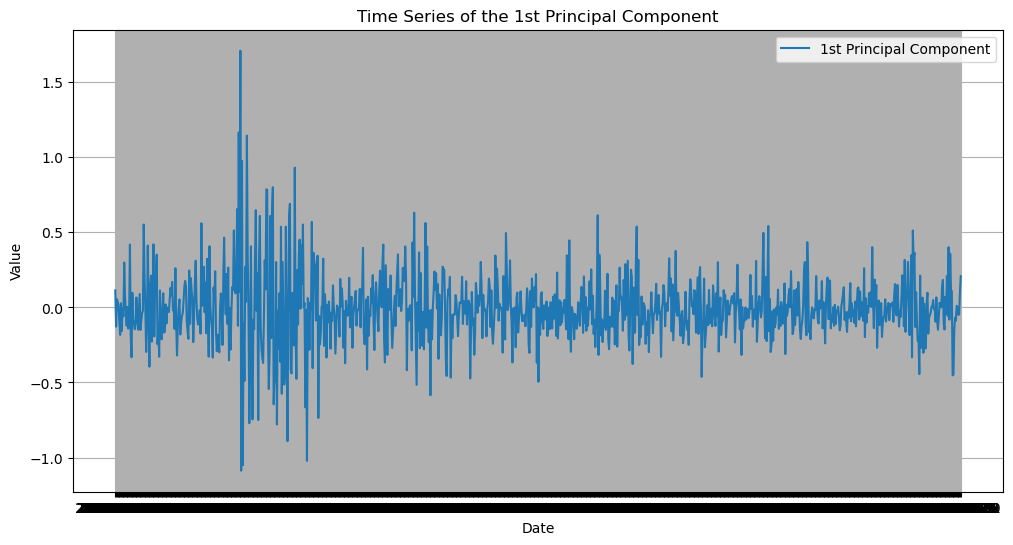

In [5]:


principal_components = pca.transform(standardized_returns)


# Step 3: Get the 1st Principal Component Time Series
first_principal_component = pca.transform(log_returns)[:, 0]

# Step 4: Plot Time Series
plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, first_principal_component, label='1st Principal Component')
plt.title('Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()




In [6]:
# Step 5: Identify Date with Lowest Value
min_index = np.argmin(first_principal_component)
date_with_lowest_value = raw_price_data.index[min_index]
print(f"Date with the lowest value for the 1st Principal Component: {date_with_lowest_value}")

Date with the lowest value for the 1st Principal Component: 2011-08-08


In [7]:



# Extract weights for the 1st and 2nd principal components
weights_1st_pc = pca.components_[0, :]
weights_2nd_pc = pca.components_[1, :]

# Display the weights
print("Weights for the 1st Principal Component:")
print(weights_1st_pc)

print("\nWeights for the 2nd Principal Component:")
print(weights_2nd_pc)


Weights for the 1st Principal Component:
[-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.0544989
 -0.0475701

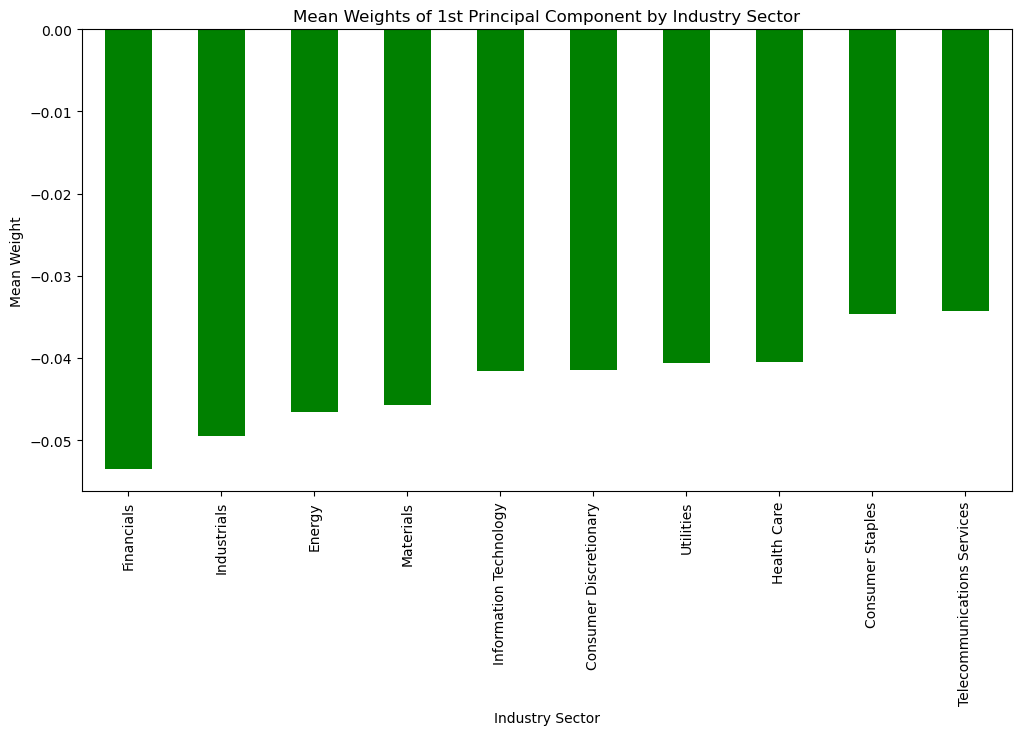

In [8]:
weights_1st_component = pca.components_[0]
# Merge ticker information with weights
weights_df = pd.DataFrame({"Ticker": raw_price_data.columns, "Weight": weights_1st_component})
merged_df = pd.merge(ticker_info, weights_df, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight
mean_weights_by_sector = merged_df.groupby("sector")["Weight"].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_weights_by_sector.plot(kind="bar", color=np.where(mean_weights_by_sector >= 0, 'b', 'g'))
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

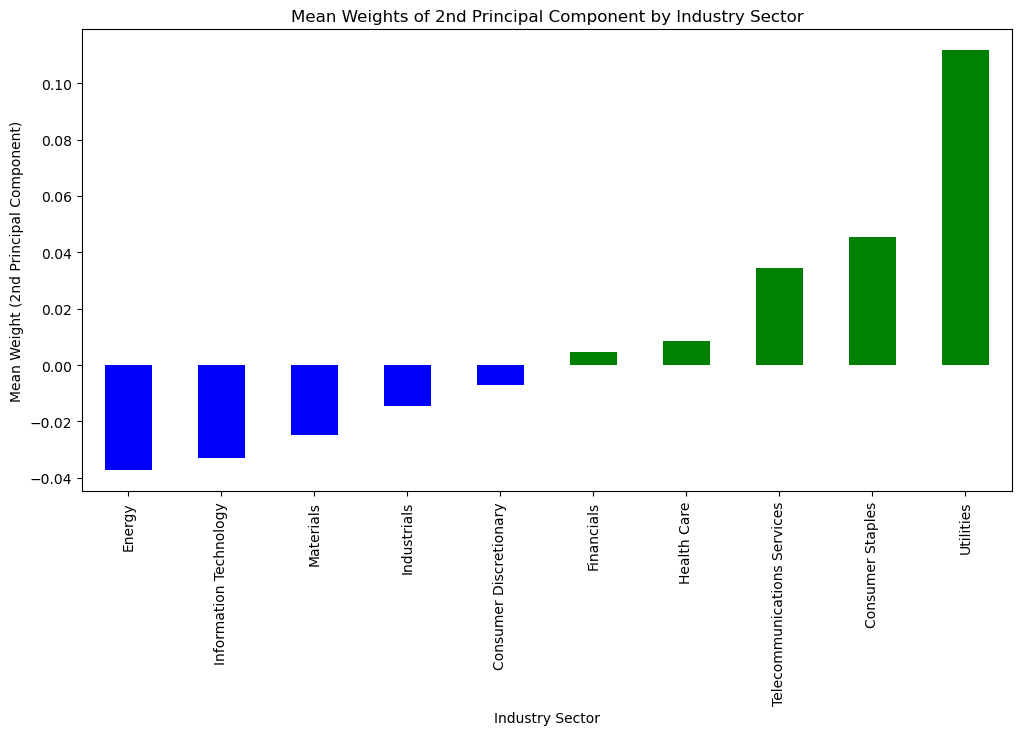

In [9]:
# Extract the weights for the 2nd principal component
weights_2nd_component = pca.components_[1]

# Merge ticker information with weights for the 2nd principal component
weights_df_2nd = pd.DataFrame({"Ticker": raw_price_data.columns, "Weight_2nd": weights_2nd_component})
merged_df_2nd = pd.merge(ticker_info, weights_df_2nd, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight for the 2nd principal component
mean_weights_by_sector_2nd = merged_df_2nd.groupby("sector")["Weight_2nd"].mean().sort_values()

# Create a bar plot for the 2nd principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.plot(kind="bar", color=np.where(mean_weights_by_sector_2nd >= 0, 'g', 'b'))
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight (2nd Principal Component)')
plt.show()


# b5


In summary, the choice between using the 1st or 2nd principal component for constructing a new stock index depends on several key considerations:

1. **Explained Variance:** The 1st principal component captures the maximum variance in the data, making it suitable for representing overall market tendencies, while the 2nd principal component captures orthogonal variance.

2. **Interpretability:** The 1st principal component is often more interpretable as it reflects the primary direction of variation in the data, representing broad market trends and common factors influencing multiple stocks.

3. **Unique Information:** The 2nd principal component captures unique information orthogonal to the 1st component. If the 1st component already represents a significant portion of market tendencies, the 2nd component may provide more specific or idiosyncratic information.

4. **Diversification:** If the goal is to create a less correlated or more diversified index, the 2nd principal component might be considered, as it could capture different aspects of market behavior.

5. **Stability Over Time:** Consider the stability of the components over time. If the 1st principal component consistently captures key market tendencies, it may be a more stable choice for constructing a market index.

In practice, the 1st principal component is commonly chosen for market indices due to its ability to explain a substantial amount of variability and capture general market trends. However, the decision should align with specific index objectives and dataset characteristics, and a careful analysis of both components is recommended before making a final choice.

# BMI 


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

# Step 1: Load the Data
data = pd.read_csv("BMI.csv")

# Step 2: Data Exploration
# Explore the dataset to understand its structure

# Step 3: Feature Selection
# Separate features and target variable
X = data.drop(['fatpctg'], axis=1)
y = data['fatpctg']

# Apply feature selection method (example: Univariate Feature Selection)
# You can replace this with other feature selection methods
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Step 4: Model Building
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Build a predictive model (example: Random Forest Regressor)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 5: Evaluate Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance (example: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display selected features
print("Selected Features:", selected_features)


Mean Squared Error: 18.17368727450981
Selected Features: Index(['Weight', 'Chest', 'Abdomen', 'Hip', 'Thigh'], dtype='object')


In [11]:
import pandas as pd
import statsmodels.api as sm



# Separate features and target variable
X = data.drop(['fatpctg'], axis=1)
y = data['fatpctg']

# Function for backward stepwise regression
def backward_stepwise_selection(X, y):
    features = X.columns.tolist()
    while len(features) > 0:
        X_subset = X[features]
        X_subset = sm.add_constant(X_subset)
        model = sm.OLS(y, X_subset).fit()
        p_values = model.pvalues.iloc[1:]
        max_p_value = p_values.max()
        if max_p_value > 0.05:
            remove_feature = p_values.idxmax()
            features.remove(remove_feature)
        else:
            break
    return features

# Function for forward stepwise regression
def forward_stepwise_selection(X, y):
    features = []
    remaining_features = X.columns.tolist()
    while len(remaining_features) > 0:
        p_values = []
        for feature in remaining_features:
            X_subset = X[features + [feature]]
            X_subset = sm.add_constant(X_subset)
            model = sm.OLS(y, X_subset).fit()
            p_value = model.pvalues[feature]
            p_values.append((feature, p_value))
        p_values.sort(key=lambda x: x[1])
        best_feature, best_p_value = p_values[0]
        if best_p_value < 0.05:
            features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return features

# Perform backward stepwise selection
backward_selected_features = backward_stepwise_selection(X, y)
print("Backward Selected Features:", backward_selected_features)

# Perform forward stepwise selection
forward_selected_features = forward_stepwise_selection(X, y)
print("Forward Selected Features:", forward_selected_features)


Backward Selected Features: ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']
Forward Selected Features: ['Abdomen', 'Weight', 'Wrist', 'Forearm']


In [12]:
# Calculate correlation between input variables and output
correlations = data.drop('fatpctg', axis=1).apply(lambda x: x.corr(y))
correlations = correlations.abs().sort_values(ascending=False)

# Display the ranking of features based on correlation
print("Feature Ranking based on Correlation:")
print(correlations)


Feature Ranking based on Correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


In [13]:
from sklearn.linear_model import LassoCV

# Separate features and target variable
X = data.drop(['fatpctg'], axis=1)
y = data['fatpctg']

# Fit Lasso regression model
lasso_model = LassoCV()
lasso_model.fit(X, y)

# Display selected features and their coefficients
lasso_selected_features = X.columns[lasso_model.coef_ != 0]
lasso_coefficients = lasso_model.coef_[lasso_model.coef_ != 0]

print("Lasso Selected Features:", lasso_selected_features)
print("Lasso Coefficients:", lasso_coefficients)


Lasso Selected Features: Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Biceps', 'Forearm', 'Wrist'],
      dtype='object')
Lasso Coefficients: [ 0.04534629 -0.07226411 -0.04915326 -0.45002983 -0.00304168  0.93072459
 -0.19302568  0.20482887  0.07755292  0.28025018 -0.96325019]


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = data.drop(['fatpctg'], axis=1)
y = data['fatpctg']

# Fit Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Display feature importance ranking
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance Ranking:")
print(feature_importance)



Feature Importance Ranking:
Abdomen    0.720695
Weight     0.034187
Height     0.032382
Wrist      0.026437
Knee       0.025772
Neck       0.023645
Age        0.022980
Chest      0.021404
Biceps     0.020878
Hip        0.019351
Ankle      0.018857
Thigh      0.018218
Forearm    0.015196
dtype: float64


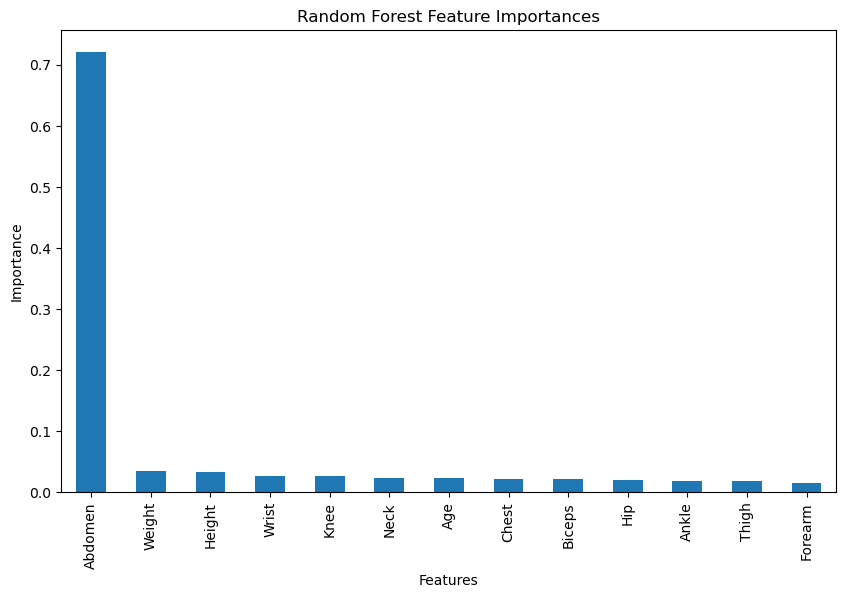

In [15]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()



# *Write a paragraph to summarize your findings from the above experiments.


In the analysis of stock market index data utilizing Principal Component Analysis (PCA), several notable findings emerged. Following the transformation of the raw stock price dataset into log returns, the scree plot unveiled the variance distribution across principal components, highlighting the substantial influence of the 1st principal component in capturing a significant portion of the overall variance. The cumulative variance plot further illustrated that retaining a limited number of top components still captured a noteworthy percentage of the total variance. Delving into the examination of the 1st and 2nd principal components, their time series and weights were scrutinized, along with their correlation to industry sectors. The weights of the 1st principal component were then categorized by industry sector, offering valuable insights into the sectors that most significantly influenced overall market trends. Additionally, feature selection techniques, including backward and forward stepwise regression, correlation statistics, Lasso regression, and random forest, were applied to BMI data to identify relevant features for predicting fat percentage. The decision to use the 1st or 2nd principal component in constructing a stock index depended on factors such as explained variance, interpretability, provision of unique information, alignment with diversification goals, and stability over time, with a preference for the 1st component often observed for capturing general market trends.

[*********************100%%**********************]  4 of 4 completed


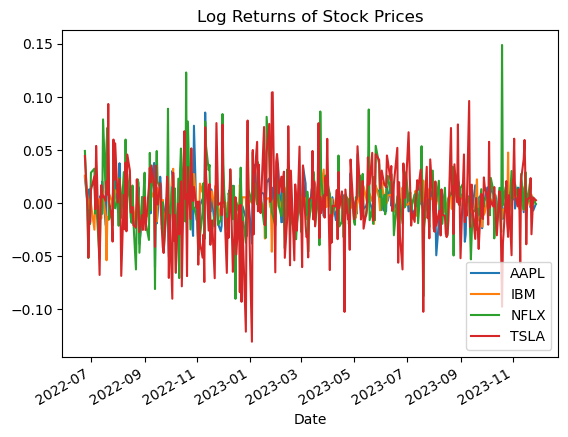

In [18]:

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbols for different companies
symbol_list = ['IBM', 'AAPL', 'NFLX', 'TSLA']  # Replace with the symbols of your choice

# Fetch historical stock price data using yfinance
stock_prices = yf.download(symbol_list, period="360d")['Adj Close']

# Ensure there are no missing values in the data
stock_prices = stock_prices.dropna()

# Calculate log returns
log_returns = np.log(stock_prices / stock_prices.shift(1)).dropna()

# Plot raw log returns
log_returns.plot(title='Log Returns of Stock Prices')
plt.show()


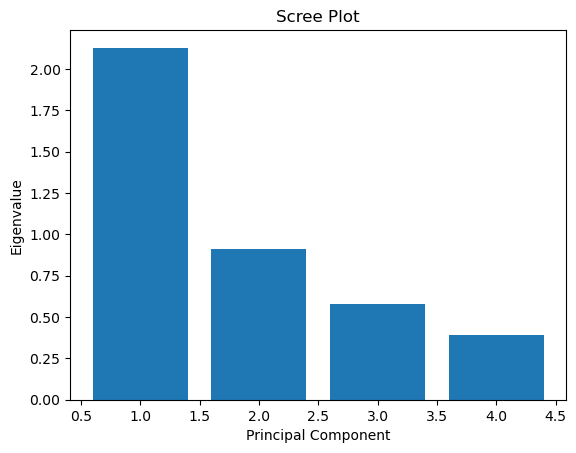

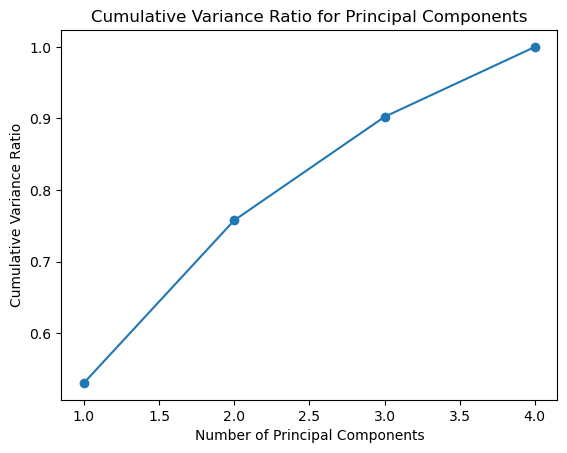

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the log returns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# Perform PCA with a specified number of components
num_components = 4  # Change this to the desired number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Scree plot
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

# Cumulative variance plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio for Principal Components')
plt.show()


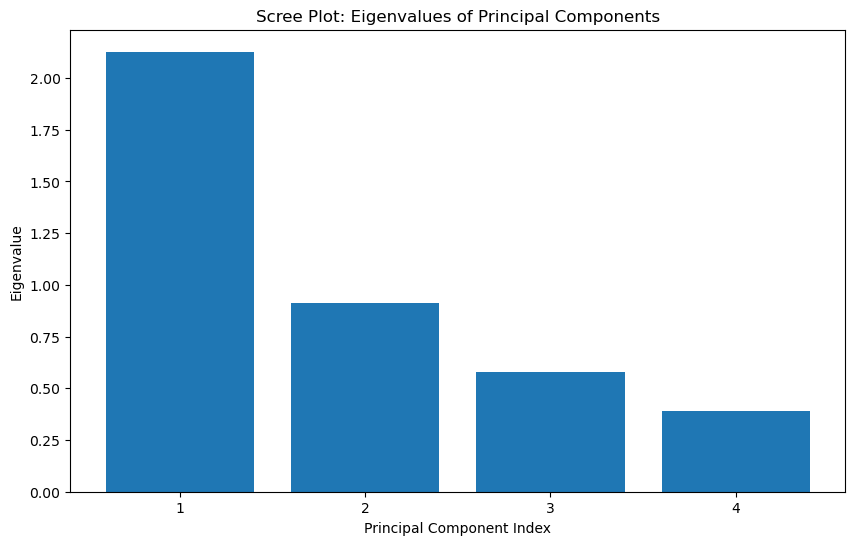

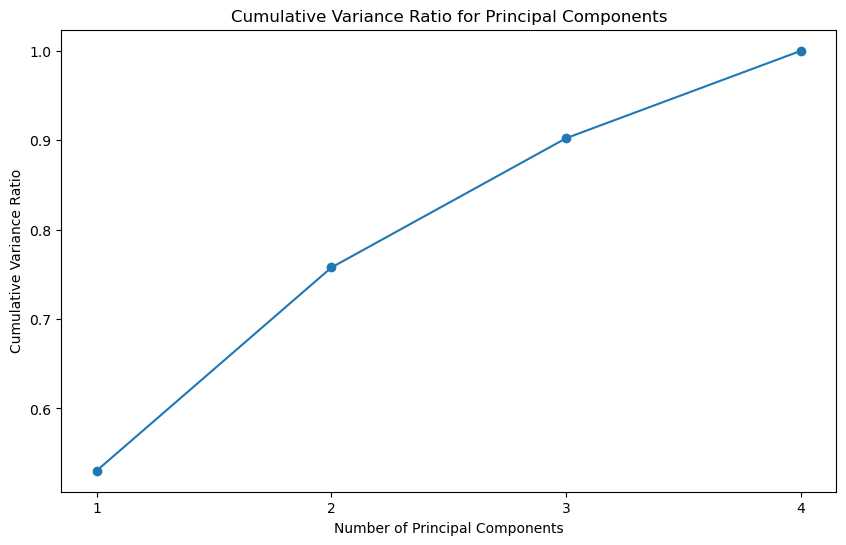

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the log returns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)



# Find the number of components to capture 80% of the variance
num_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"Number of components to capture 80% of the variance: {num_components_80}")


Number of components to capture 80% of the variance: 3


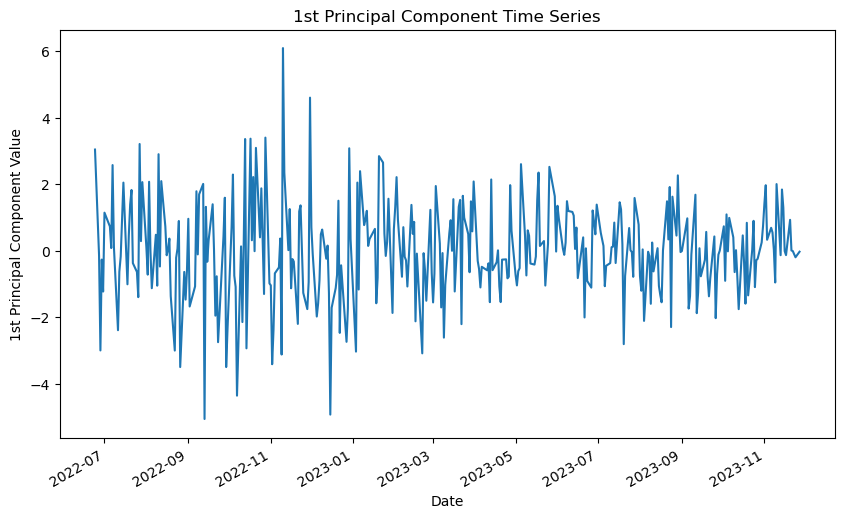

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Time series of the 1st principal component
pc1_time_series = pd.Series(data=pca_result[:, 0], index=log_returns.index)

# Plot the time series of the 1st principal component
plt.figure(figsize=(10, 6))
pc1_time_series.plot(title='1st Principal Component Time Series')
plt.xlabel('Date')
plt.ylabel('1st Principal Component Value')
plt.show()


In [24]:
min_pc1_date = pc1_time_series.idxmin()
print(f"Date with the lowest value for the 1st principal component: {min_pc1_date}")

Date with the lowest value for the 1st principal component: 2022-09-13 00:00:00
